# NLP - How to spaCy

In [79]:
import spacy
from spacy.lang.pt import Portuguese
from spacy import displacy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from spacy.lang.pt.stop_words import STOP_WORDS
from wordcloud import WordCloud

# 1. Introdução
## 1.1 Porque spaCy?

* **spaCy** é uma biblioteca open-source para ~~Natural Language Processing~~ (NLP) em Python
* Pode ser usado para **Extração de informações, processamento de linguagem e Deep Learn**
 
## 1.2. Features

1.  **Tokenization**: Seguimentação do texto
2. **Part-of-speech tagging**: Caracteriza os tipos de palavras em tokens, como Verbos e nomes...
3. **Dependency Parsing**: Caracteriza dependencias sintáticas e descreve as relações entre tokens, como sujeito e objeto.
4. **Lemmatization**: Caracteriza a forma base das palavras. O *Lemma* de *Estava* é *está*, o *Lemma* de *ratos* é *rato*.
5.  **Sentence Boundary Detection (SBD)**: Encontra e seguimenta sentenças individuais.
6. **Named Entity Recognition (NER)**: Faz o rótulo de objetos do "Mundo-Real", como pessoas, companhias ou locais.
7. **Entity Linking**: Tira a Ambiguidade de entidades textuais.
8. **Similarity**: Compara palavras, texto e documentos e quão similar eles são.
9. **Text Classification**: Caracteriza categorias ou rótulos para um documento.
10. **Rule-based Matching**: Encontra sequências de tokens.
11. **Training**: Atualiza e implementa um modelo estatísico
12. **Serialization**: Salva o objeto em arquivos ou byte strings.

## 1.3. Modelo

* **pt_core_news_sm**: Portuguese multi-task CNN treinado em Universal Dependencies e WikiNER corpus.
* (Small Model), nao compara Similaridade semantica

## 2. Tokenization
### 2.1 Sentence tokenization

1. A tokenizacao de sentencas consiste em separar o texto. 
2. O algoritmo procura padroes para realizar essa separacao.
3. Uma parcela do Documento Tokenizado é chamado de **Span**

In [2]:
nlp = spacy.load('pt_core_news_sm')
doc = nlp('Oi Mundo!')
span = doc[1:4]
print(span.text)


Mundo!


### 2.2. Atributos Lexical

* Os Atributos a seguir sao chamados de Lexical, eles referem-se a uma entrada do vocabulario que nao depende do contexto do Token

In [3]:
doc = nlp('Custa apenas $5.')

print('Index: ', [token.i for token in doc])
print('Text: ', [token.text for token in doc])
print('is_alpha: ', [token.is_alpha for token in doc]) # Verifica se e uma palavra
print('is_punct: ', [token.is_punct for token in doc]) # Verifica se e uma pontuacao
print('like_num: ', [token.like_num for token in doc]) # Verifica se e um numero

Index:  [0, 1, 2, 3, 4]
Text:  ['Custa', 'apenas', '$', '5', '.']
is_alpha:  [True, True, False, False, False]
is_punct:  [False, False, False, False, True]
like_num:  [False, False, False, True, False]


## 3. Data Structures
### 3.1. Vocab, Lexemes e StringStore
* **Vocab**: Guarda os dados compartilhados entre multiplos documentos
* Para reduzir o custo computacional, todas as strings sao codificadas em hash values.
* Strings sao apenas guardadas uma vez em StringStore via nlp.vocab.strings.

### 3.1.1. Compartilhando Vocab e armazenando strings

In [4]:
doc = nlp('Eu amo café')
print('Hash Value: ', nlp.vocab.strings['café'])
print('String Value: ', nlp.vocab.strings[32833993555699147])

Hash Value:  32833993555699147
String Value:  café


### 3.1.2 Lexemes: Entradas no vocabulario
* Um objeto Lexeme e uma entrada o vocabulario
* Nao depende do contexto


In [5]:
doc = nlp('Eu amo café')
lexemme = nlp.vocab['café']
print(lexemme.text, lexemme.orth, lexemme.is_alpha)

café 32833993555699147 True


## 3.2 Doc, Span and Token

* O Doc é um dos objetos centrais do spaCy. Um Doc é criado automaticamente quando processa-se um texto com o objeto nlp.
* Depois de criar um objeto nlp, pode-se import a classe Doc de spacy.tokens
* A classe Doc tem 3 argumentos: O Vocab compartilhado, As palavras e os espaços.


In [6]:
from spacy.tokens import Doc, Span

words = ['Oi', 'Mundo', '!']
spaces = [True, False, False]
doc = Doc(nlp.vocab, words=words, spaces=spaces)

span = Span(doc, 0, 2)
span_with_label = Span(doc, 0, 2, label='Saudacoes')

doc.ents = [span_with_label]
print(doc.text, span)

Oi Mundo! Oi Mundo


## 3.3. Word vectors e similaridades semanticas
* spaCy pode comparar dois objetos e predizer sua similaridade
> Doc.similarity(), Span.similarity(), Token.similarity()
* Pega um objeto e retorna um score de similaridade
* O Modelo precisa ter Word Vectors para funcionar bem

In [7]:
doc_1 = nlp('Eu amo fast food')
doc_2 = nlp('Eu amo pizza')
print(doc_1.similarity(doc_2))

0.822414775542685


/home/leleopc/Downloads/conda/envs/Env1/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


### 3.3.1 Como o spaCy prediz a similaridade?
* A similaridade e determinada usando Word Vectors
* Significado Multi-dimensional de palavras
* A similaridade por Cosseno pode ser ajustada
* Frases curtas sao melhores que documentos grandes com palavras irrelevantes

In [8]:
doc = nlp('Eu tenho uma banana')
print(doc[3].vector)

[  1.1939198   -6.53442     -5.8688383   -6.8318      -1.2632443
   4.842185     4.929263     1.6764264   -1.208786     3.7256331
   2.9029343    2.9943693    5.186689    -0.6428796    0.52023226
  -5.7425995  -12.242809     2.1617079   -2.5336413   -0.18788606
   8.600147     0.87637085   4.35049      6.113413    -4.8328347
   3.5070467    2.1876416    6.243062    -4.6474767    4.3824987
  -3.1894245   -5.83116      3.2183127   -4.216261    -0.94828105
  -8.892079     2.6738293    0.926895    -2.1094775   -2.1312869
   1.2773345   -1.6779451   10.603294    -2.206038    -7.2862177
   2.9273815   -2.089494    -2.6414983    1.4514121   -6.784997
   1.6330619   -4.4343033   -5.607864    -1.709214     4.699877
  -5.157643     4.681074     3.1368465    3.5729027   -2.9518728
   6.5930853   -1.8062642    5.5722623   -5.0710793    6.005385
   1.2278724    4.496413    -9.541932    -1.6697747   -1.44403
   5.5247426    2.2625136    3.908644    -0.86276877  -7.816847
  -3.302119     2.1586566   

* A similaridade depende do contexto


In [9]:
doc_1 = nlp('Eu adoro gatos')
doc_2 = nlp('Eu odeio cachorros')

print(doc_1.similarity(doc_2))

0.8364147553707078


/home/leleopc/Downloads/conda/envs/Env1/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


## 3.4. Combinando Modelos e Regras

* **Patterns** sao listas de dicionario, e cara dicionario descreve um token e seus atributos.
* Patterns podem ser adicionados a um Matcher usando matcher.addmethod
* Chamar o matcher em um objeto doc retornara uma lista de matches. Cada match e uma tupla consistindo em um ID e o comeco e fim do index do token

In [10]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

pattern = [{'LEMMA': 'amo', 'POS': 'VERB'}, {'LOWER': 'gatos'}]
matcher.add('LOVER_CATS', None, pattern)

pattern = [{'TEXT': 'muito', 'OP': '+'}, {'TEXT': 'feliz'}]
matcher.add('MUITO_FELIZ', None, pattern)

doc = nlp('Eu amo gatos e eu estou muito muito feliz')
matches = matcher(doc)
print(matches)

[(8737177397717030217, 7, 9), (8737177397717030217, 6, 9)]


* Os objetos Span, da-nos acesso ao documento original e todos outros atributos do token e linguistic features predicted pelo modelo.


In [11]:
matcher = Matcher(nlp.vocab)
matcher.add('Cachorro', None, [{'LOWER': 'golden'}, {'LOWER': 'retriever'}])
doc = nlp('Eu tenho um Golden Retriever')

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print('Matched span:', span.text)
    print('Root token:', span.root.text)
    print('Root gead token:', span.root.head.text)
    print('Previous token:', doc[start-1].text, doc[start-1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root gead token: Retriever
Previous token: um DET


### 3.4.1 Efficient Phrase matching
* Utiliza o Doc como patterns
* Mais eficiente e rapido que o Matcher
* Bom para matching em grande quantidade

In [12]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

pattern = nlp('Golden Retriever')
matcher.add('Cachorro', None, pattern)
doc = nlp('Eu tenho um Golden Retriever')

for match_id, start, end, in matcher(doc):
    span = doc[start:end]
    print('Matched span:', span.text)

Matched span: Golden Retriever


## 4. Tecnicas
### 4.1 Explica entidades

In [13]:
def explica_entidade(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

explica_entidade('Eu queria comer um Biggs')

Entity: Biggs, Label: PER, Named person or family.


In [16]:
text = 'É um vírus que tem causado doença respiratória pelo agente coronavírus, recentemente identificado na China. Os coronavírus são uma grande família viral, conhecidos desde meados de 1960, que causam infecções respiratórias em seres humanos e em animais. Geralmente, infecções por coronavírus causam doenças respiratórias leves a moderadas, semelhantes a um resfriado comum. Alguns coronavírus podem causar doenças graves com impacto importante em termos de saúde pública, como a Sars (Síndrome Respiratória Aguda Grave), identificada em 2002 e a Mers (Síndrome Respiratória do Oriente Médio), identificada em 2012'

In [53]:
doc = nlp(text)
spacy.displacy.render(doc, style='ent', jupyter=True)
explica_entidade(text)
#for token in doc:
    #print(token, token.pos_)

Entity: China, Label: LOC, Non-GPE locations, mountain ranges, bodies of water
Entity: Sars, Label: ORG, Companies, agencies, institutions, etc.
Entity: Síndrome Respiratória Aguda Grave, Label: MISC, Miscellaneous entities, e.g. events, nationalities, products or works of art
Entity: Mers, Label: ORG, Companies, agencies, institutions, etc.
Entity: Síndrome Respiratória do Oriente Médio, Label: MISC, Miscellaneous entities, e.g. events, nationalities, products or works of art


### 4.2 Plotting words

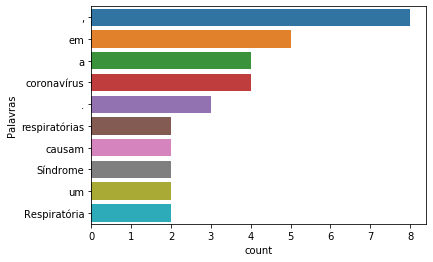

In [73]:
items = list(doc)
items = [str(x) for x in items]
df_nouns = pd.DataFrame(items, columns=['Palavras'])
plt.figure()
sns.countplot(y='Palavras', data=df_nouns, order=df_nouns['Palavras'].value_counts().iloc[:10].index)
plt.show()

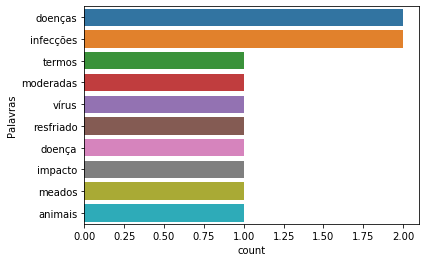

In [76]:
items_1 = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == 'NOUN') and (len(str(token))>2):
        items_1.append(token)
        
items_1 = [str(x) for x in items_1]

df_nouns_1 = pd.DataFrame(items_1, columns=['Palavras'])
plt.figure()
sns.countplot(y='Palavras', data=df_nouns_1, order=df_nouns_1['Palavras'].value_counts().iloc[:10].index)
plt.show()

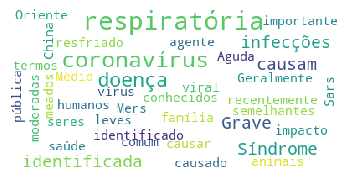

In [81]:
plt.figure()
wordcloud = WordCloud(background_color = 'white',
                     stopwords=STOP_WORDS,
                     max_words=45,
                     max_font_size=30,
                     random_state=42,
                     ).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()